# Lecture 06 Data Preparation and Regression Modeling


* Eco5360, Fall 2023, by David Guo

* OSL for RL (y is continuous variable)
* Logsitcs regression (prob for 0/1)

* Adapted and Modified from [Kaggle Project](https://www.kaggle.com/joeljoaquim/hml-chap02-end-to-end-machine-learning-project)

## Modeling Project Checklist
This checklist can guide you through your Machine Learning/Modeling projects. There are eight main steps:
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.   

**Obviously, you should feel free to adapt this checklist to your needs.**  
For more details, see appendix

# 1. Frame the problem and look at the big picture  

The first question to ask your model user (customer) is what exactly is the business objective; building a
model is probably not the end goal. How does the user expect to **use and benefit**
from this model? This is important because it will determine how you frame the
problem, what algorithms you will select, what performance measure you will use to
evaluate your model, and how much effort you should spend tweaking it.  
For example, your model user answers that your model’s output (a prediction of a district’s median housing
price) will be fed to another Machine Learning system , along
with many other signals. This downstream system will determine whether it is worth
investing in a given area or not. Getting this right is critical, as it directly affects revenue.

**Modeling Purpose for this project: The task is to predict median house values in Californian districts, given a number of features from these districts.**

## Current Solutions?
Eg.: the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district (excluding median housing prices), and they use complex rules to come up with an estimate. This is costly and time-consuming, and their estimates are not great; their typical error rate is about 15%.

## Check the Assumptions (Project Specific)
It is good practice to list and verify the assumptions that were made so far (by
you and/or model users); this can catch serious issues early on. For example, the district prices
that your system outputs are going to be fed into a downstream Machine Learning
system, and we assume that these prices are going to be used as such. But what if the
downstream system actually converts the prices into categories (e.g., “cheap,”
“medium,” or “expensive”) and then uses those categories instead of the prices themselves?
In this case, getting the price perfectly right is not important at all; your system
just needs to get the category right. If that’s so, then the problem should have
been framed as a classification task, not a regression task. You don’t want to find this
out after working on a regression system for months.
Fortunately, after talking with the team in charge of the downstream system, you are
confident that they do indeed need the actual prices, not just categories. Great! You’re
all set, the lights are green, and you can start coding now!

# 2. Data

The California Housing Prices dataset is originally from the StatLib repository. This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning.   
Source: https://www.kaggle.com/camnugent/california-housing-prices

In [1]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

# to make this notebook's output stable across runs
np.random.seed(42)

In [47]:
housing = pd.read_csv("./housing.csv")
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.shape

(20640, 10)

In [ ]:
#regressionm model with DV an IV, 
# DV:median_house_value
# IV: all other vars other than DV 

This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block
group typically has a population of 600 to 3000 people). We will just call them “districts” for short.

Each row represents one district. There are 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bed
rooms, population, households, median_income, median_house_value, and
ocean_proximity. 

In [3]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [59]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [36]:
housing.describe()
#total_bedrooms has missing values

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. Notice that the `total_bedrooms` attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.

Another quick way to get a feel of the type of data you are dealing with is to plot a
histogram for each numerical attribute. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis). You can
either plot this one attribute at a time, or you can call the `hist()` method on the
whole dataset, and it will plot a histogram for each numerical attribute. For example, you can see that slightly over 800 districts have a
`median_house_value` equal to about $500,000.

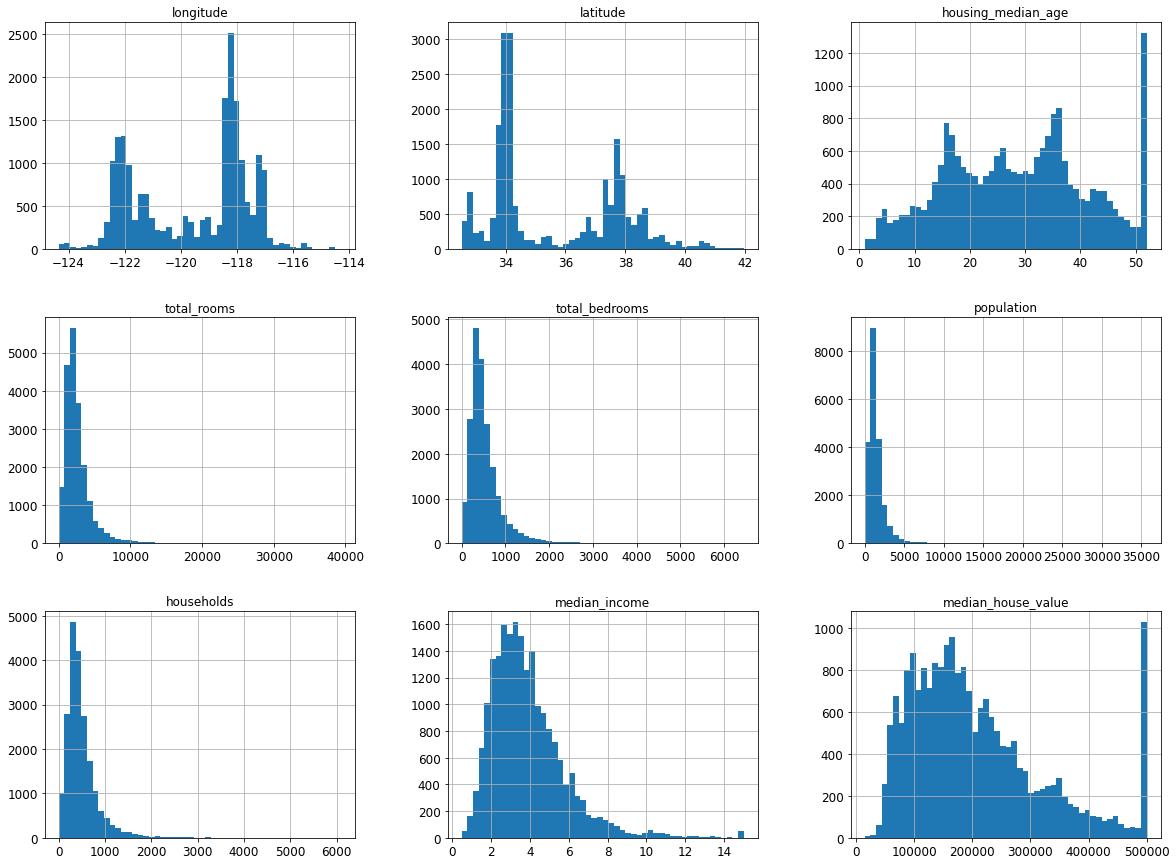

In [135]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Notice a few things in these histograms:
1. First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. Working with
preprocessed attributes is common in Machine Learning, and it is not necessarily
a problem, but you should try to understand how the data was computed.
2. The housing median age and the median house value were also capped. The latter
may be a serious problem since it is your target attribute (your labels). Your
Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s output)
to see if this is a problem or not. If they tell you that they need precise predictions
even beyond \\$500,000, then you have mainly two options:
a. Collect proper labels for the districts whose labels were capped.
b. Remove those districts from the training set (and also from the test set, since
your system should not be evaluated poorly if it predicts values beyond
\\$500,000).
3. These attributes have very different scales. We will discuss this later when we explore feature scaling.
4. Finally, many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.

All attributes are numerical, except the `ocean_proximity` field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in that column were repetitive, which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the `value_counts()` method

# 3. Discover and visualize the data to gain insights

## 3.1 Visualizing Geographical Data
Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data

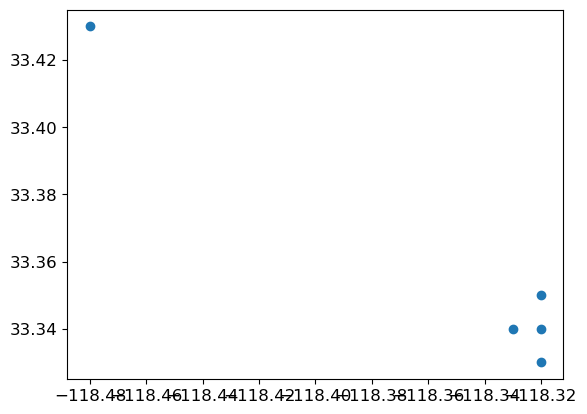

In [60]:
house_i = housing[housing.ocean_proximity == "ISLAND"]
plt.scatter(house_i.longitude, house_i.latitude)
plt.show() #for parsimony purpose, we might think about dropping it.

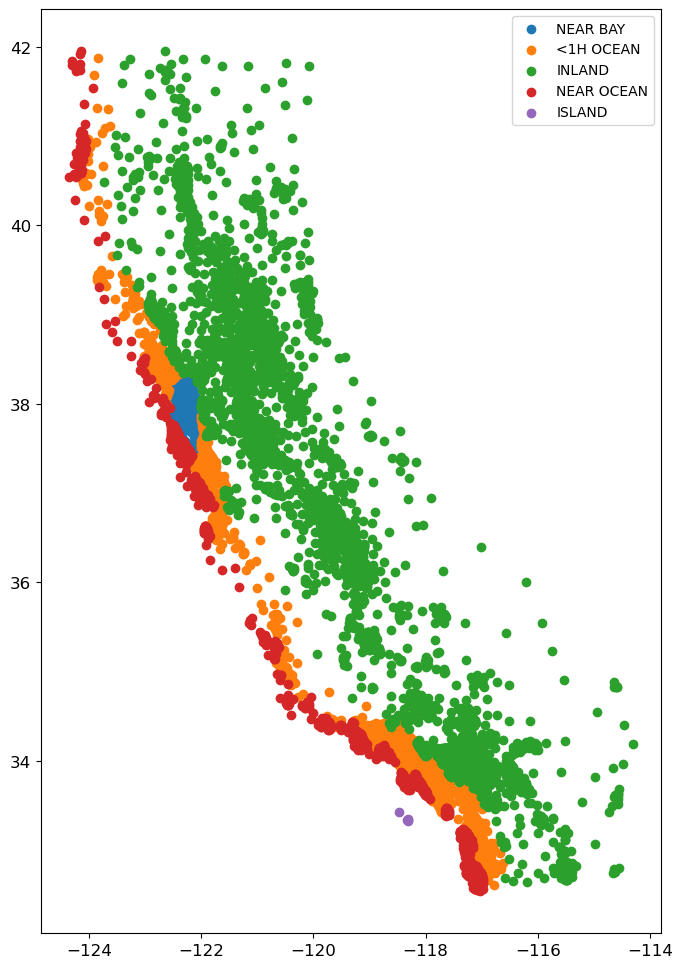

In [61]:
#show ocean_proximity class in different colors
fig, ax = plt.subplots(figsize=(8, 12))

for i in housing["ocean_proximity"].unique():
    house_i = housing[housing.ocean_proximity == i]
    ax.scatter(house_i.longitude, house_i.latitude, label = i)
           
plt.legend(loc = 0)
plt.show()

In [3]:
housing.median_house_value[housing.ocean_proximity == "ISLAND"].describe()

count         5.000000
mean     380440.000000
std       80559.561816
min      287500.000000
25%      300000.000000
50%      414700.000000
75%      450000.000000
max      450000.000000
Name: median_house_value, dtype: float64

In [4]:
housing.median_house_value[housing.ocean_proximity == "NEAR OCEAN"].describe()

count      2658.000000
mean     249433.977427
std      122477.145927
min       22500.000000
25%      150000.000000
50%      229450.000000
75%      322750.000000
max      500001.000000
Name: median_house_value, dtype: float64

# run a quick ks-test on "ISLAND" and "NEAR OCEAN" properties
* run a 2-smaple Kolmogorov-Smirnov test

In [14]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# NEAR BAY 0.015
# <1H OCEAN 0.0022
# NEAR OCEAON 0.00084

In [18]:
scipy.stats.kstest(np.array(housing.median_house_value[housing.ocean_proximity == "ISLAND"]),  
                   np.array(housing.median_house_value[housing.ocean_proximity == "NEAR BAY"])) #they are kind significantly different in teh distribution

KstestResult(statistic=0.6458515283842795, pvalue=0.0150017945589645)

* looking at the p-val of 0.075, we can conclude that properties of "ISLAND" and "NEAR OCEAN" are not significantly different based on the significance level of 0.05.

# regroup 5 "ISLAND" properties into "NEAR OCEAN"

In [48]:
housing.ocean_proximity = np.where(housing.ocean_proximity == "ISLAND", "NEAR BAY", housing.ocean_proximity)

In [20]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2295
Name: ocean_proximity, dtype: int64

This looks like California all right, but other than that it is hard to see any particular
pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points

<Axes: xlabel='longitude', ylabel='latitude'>

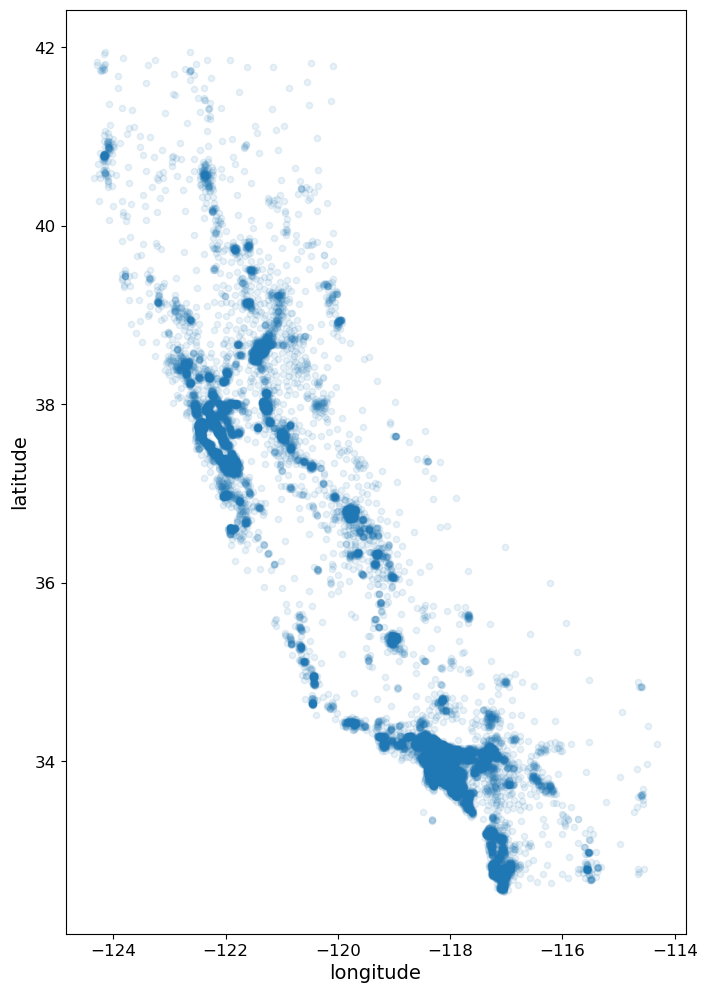

In [65]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize = (8,12))
# save_fig("better_visualization_plot")

Now let’s look at the housing prices. The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

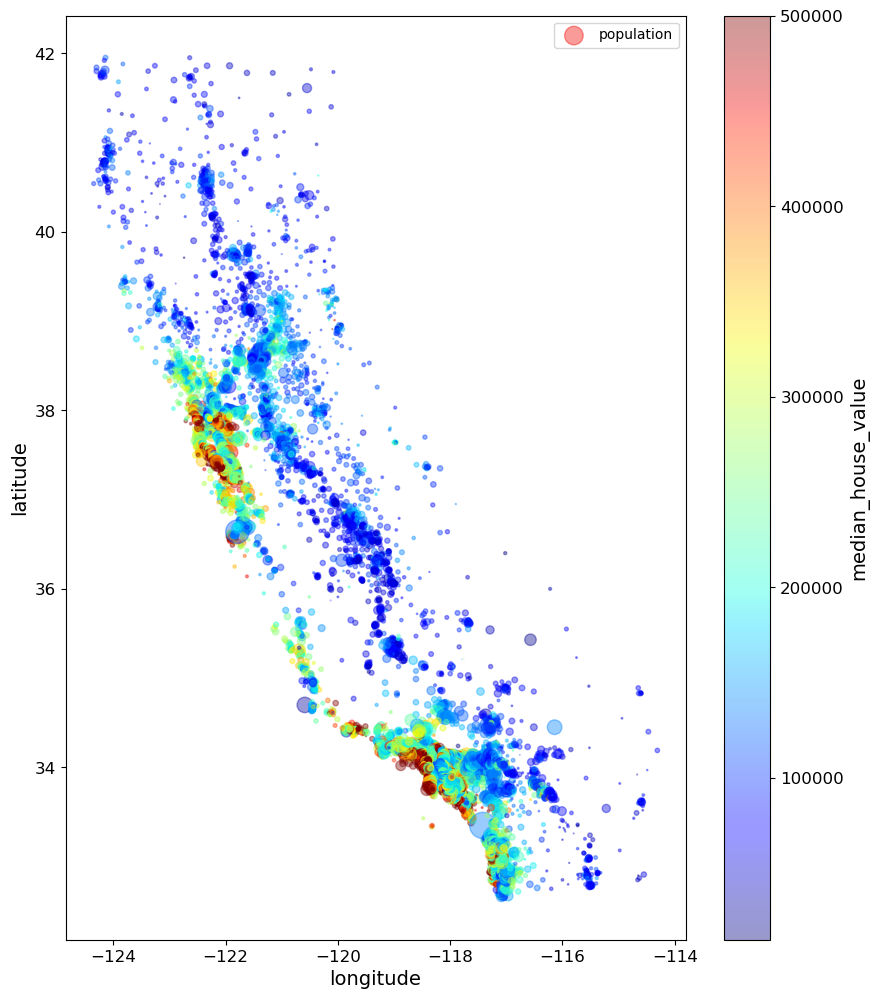

In [66]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,12),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
#     sharex=False)

plt.legend()
plt.savefig("california.png")
plt.show()

## 3.2 Looking at the correlations among variables

In [68]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [22]:
corr_matrix = housing.iloc[:, :-1].corr()
corr_matrix
# corr_matrix["median_house_value"].sort_values(ascending=False)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [ ]:
# You do not want to see many IV are highly correlated to each other. "collinearity"
# becasue IR has a big assumption says each IV should be indepedent from each other.  

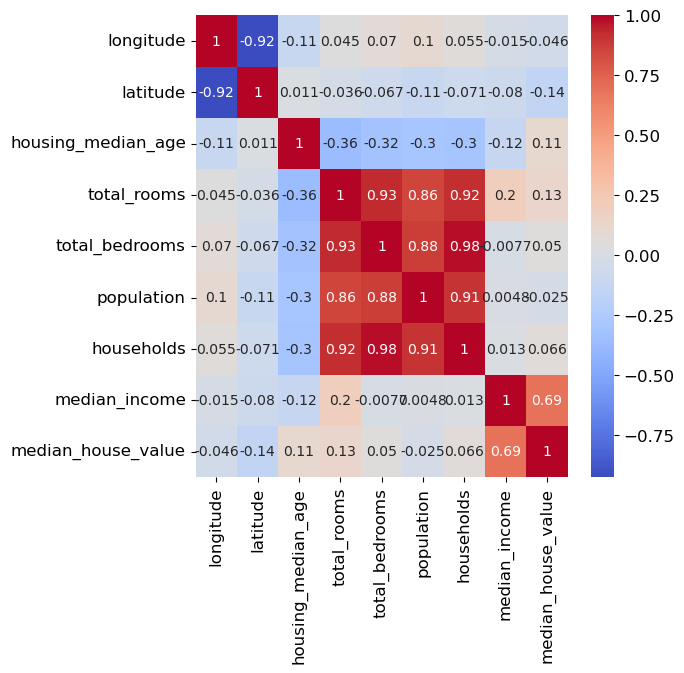

In [23]:
#correlation matrix to get initial idea of which columns are more correlated
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.xticks(rotation=90)
plt.show()

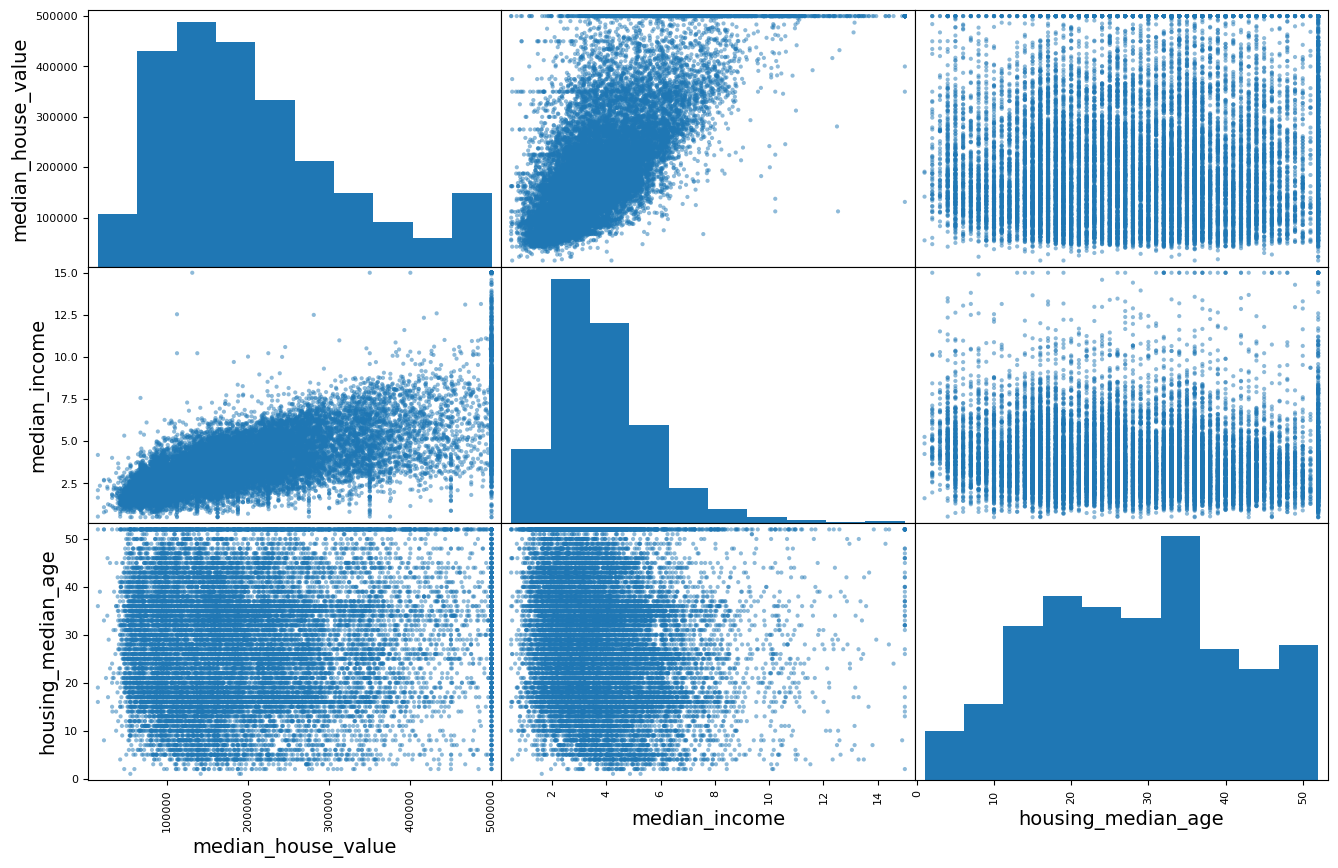

In [72]:
from pandas.plotting import scatter_matrix #

attributes = ["median_house_value", "median_income", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(16, 10))
plt.show()

# Based on the assumption of LR that the residual: $$y_i - \hat{y_i}$$  should follow a normal distribution. To satisfy this assumption, the DV had better have a normal distribution (as much as possible).

(array([4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 9.000e+00,
        3.000e+00, 1.600e+01, 2.200e+01, 4.300e+01, 7.800e+01, 1.250e+02,
        1.960e+02, 2.330e+02, 2.380e+02, 3.490e+02, 3.550e+02, 2.690e+02,
        4.140e+02, 5.760e+02, 6.440e+02, 5.180e+02, 6.760e+02, 6.150e+02,
        6.540e+02, 8.350e+02, 8.620e+02, 1.157e+03, 1.015e+03, 1.030e+03,
        1.009e+03, 8.090e+02, 1.044e+03, 9.290e+02, 7.930e+02, 8.150e+02,
        5.800e+02, 5.180e+02, 6.650e+02, 4.800e+02, 3.460e+02, 2.890e+02,
        2.610e+02, 1.154e+03]),
 array([ 9.61573881,  9.68587134,  9.75600387,  9.82613641,  9.89626894,
         9.96640147, 10.036534  , 10.10666653, 10.17679906, 10.24693159,
        10.31706412, 10.38719666, 10.45732919, 10.52746172, 10.59759425,
        10.66772678, 10.73785931, 10.80799184, 10.87812438, 10.94825691,
        11.01838944, 11.08852197, 11.1586545 , 11.22878703, 11.29891956,
        11.

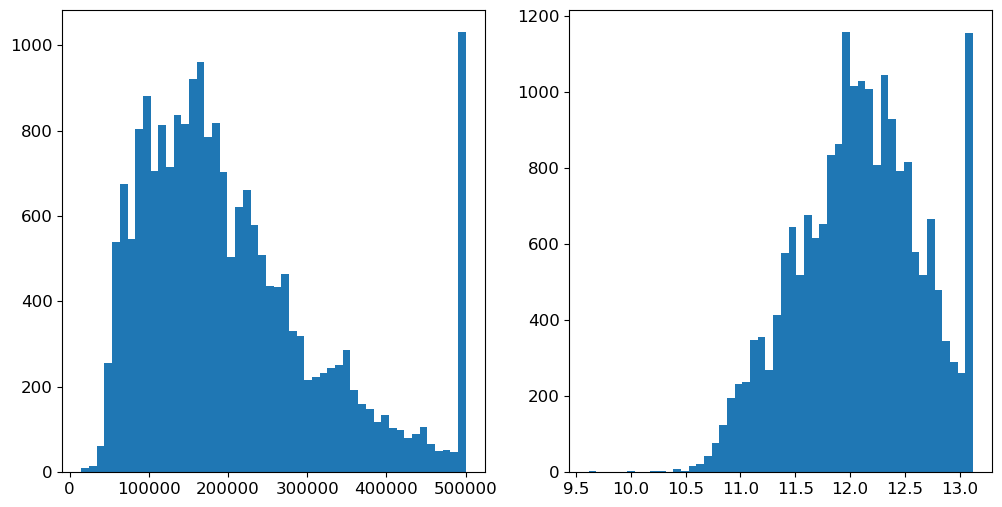

In [27]:
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.hist(housing.median_house_value, bins = 50) 
plt.subplot(122)
plt.hist(np.log(housing.median_house_value), bins = 50)
#it seems capped.

## Compare above plots, which distribution is more normal?  

* by QQ plot
* by statistical hypothesis tests

In [24]:
import statsmodels.api as sm
import pylab

QQ plot of house median value


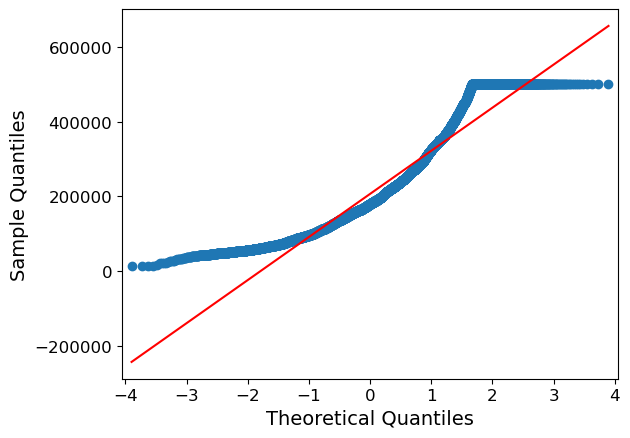

In [25]:
print('QQ plot of house median value')
sm.qqplot(housing.median_house_value, line='s')
plt.show()

QQ plot of log transformed house median value


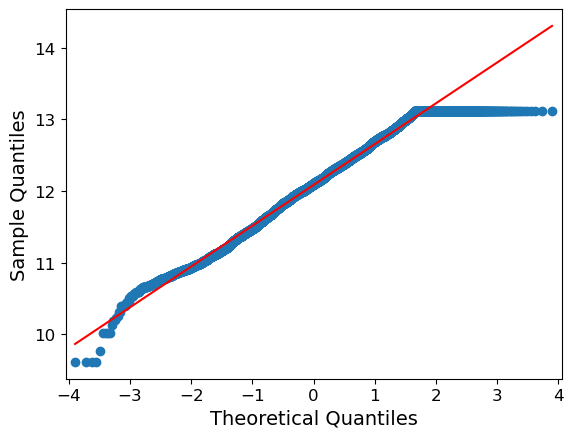

In [26]:
print('QQ plot of log transformed house median value')
sm.qqplot(np.log(housing.median_house_value), line='s')
plt.show()

# normality test on original house value

In [31]:
from scipy.stats import *

In [29]:
scipy.stats.normaltest(housing.median_house_value)

NormaltestResult(statistic=2430.931051066072, pvalue=0.0)

The statistic  of normality test is calculated as s^2 + k^2, where s is the z-score returned by skew test and k is the z-score returned by kurtosis test. normal distributions have zero for skewness and normal distributions have zero excess kurtosis.

In [32]:
ori_value_skewness = skewtest(housing.median_house_value).statistic 

In [33]:
ori_value_kurtosis = kurtosistest(housing.median_house_value).statistic

In [35]:
ori_norm_statistic = ori_value_skewness**2 + ori_value_kurtosis**2
ori_norm_statistic

2430.931051066072

* Do not want to hard code 3 lines? code a function then.

In [34]:
def getNormStatistic(data):
    ori_value_skewness = scipy.stats.skewtest(data).statistic 
    ori_value_kurtosis = stats.kurtosistest(data).statistic
    return ori_value_skewness**2 + ori_value_kurtosis**2

## normality test on nature log transformed house value

In [35]:
getNormStatistic(np.log(housing.median_house_value))

359.5441835709363

In [40]:
scipy.stats.normaltest(np.log(housing.median_house_value))

NormaltestResult(statistic=359.5441835709363, pvalue=8.432814311339089e-79)

## Conlcusion: the smaller the normality statistic, the similar the distribution follow the normal distribution    

# Data Preparation

## One-hot encoding categorical variable : "ocean_proximity"

In [ ]:
# scikit-learn <==> statsmodels

In [ ]:
pip install sklearn -U

In [ ]:
**** Let us coma back @ 2:25 pm ****

In [36]:
#sklearn:scikit-learn
try:
    import sklearn
    print(sklearn.__version__)
except:
    !pip install scikit-learn
    import sklearn
    print(sklearn.__version__)

1.3.2


In [255]:
# check version of pacakges in current environment

In [257]:
pip list >> my_version.txt

Note: you may need to restart the kernel to use updated packages.


In [42]:
# create a new environment (TBD) 
# conda activate eco6763

In [ ]:
# conda deactivate

# deal with categorical variable "ocean_proximity"

In [49]:
housing['ocean_proximity'].unique() # {'NEAR BAY':1, '<1H OCEAN':0, 'INLAND':0, 'NEAR OCEAN':0}

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN'], dtype=object)

In [ ]:
#cat_encoder.fit_transform() returns a numpy array with default of float64

In [50]:
housing['ocean_proximity'].head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

In [52]:
tt = cat_encoder.fit(housing[['ocean_proximity']]).transform(housing[['ocean_proximity']])

In [53]:
tt

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [54]:
housing_cat_1hot = pd.DataFrame(tt)
housing_cat_1hot.columns = sorted(housing.ocean_proximity.unique())

In [55]:
housing_cat_1hot.head()

<1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
0        0.0     0.0       1.0         0.0
1        0.0     0.0       1.0         0.0
2        0.0     0.0       1.0         0.0
3        0.0     0.0       1.0         0.0
4        0.0     0.0       1.0         0.0

In [56]:
housing = pd.merge(housing.drop("ocean_proximity", axis = 1),  
                   housing_cat_1hot, left_index = True, right_index =True)

In [57]:
print(housing.shape)
housing.head()

(20640, 13)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0       322.0       126.0         8.3252            452600.0        0.0   
1      2401.0      1138.0         8.3014            358500.0        0.0   
2       496.0       177.0         7.2574            352100.0        0.0   
3       558.0       219.0         5.6431            341300.0        0.0   
4       565.0       259.0         3.8462            342200.0        0.0   

   INLAND  NEAR BAY  NEAR OCEAN  
0     0.0       1.0         0.0  
1     0.0       1.0         0.0  
2     0.0       1.0         0.0  
3     0.0       1.0         0.0  
4     0.0       1.0         0.0

In [58]:
# keep a copy of prepared data so far
housing.to_csv("prepared_housing.csv", index = False)

# Imputate NA in "total_bedrooms" by KNNImputer
* Imputation for completing missing values using k-Nearest Neighbors.

In [44]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [17]:
#KNN is wildly used for clustering (non-supervised data analytics)

In [66]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median") #replaced by median of non-missing values
#imputer.fit(housing.drop('median_house_value', axis = 1)) #there is an issue here!
imputer.fit(housing)

SimpleImputer(strategy='median')

In [67]:
housing.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [73]:
#bring back housing data
housing = pd.read_csv("prepared_housing.csv")

In [74]:
from sklearn.impute import KNNImputer

In [75]:
imputer = KNNImputer(n_neighbors = 5, weights='uniform', metric='nan_euclidean')
#imputer.fit(housing) #data leakage
imputer.fit(housing.drop("median_house_value", axis = 1)) #why I drop "median_house_value"?

KNNImputer()

## Do not use the DV information for imputation, otherwise a portion of DV info wil be leak into the imputation data. This is most common mistake called data leakage issue!

In [76]:
#transform without Target
housing_imp = pd.DataFrame(imputer.transform(housing.drop("median_house_value", axis = 1)))
housing_imp.columns = housing.columns[housing.columns!="median_house_value"]

In [77]:
housing_imp.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  <1H OCEAN  INLAND  NEAR BAY  \
0       322.0       126.0         8.3252        0.0     0.0       1.0   
1      2401.0      1138.0         8.3014        0.0     0.0       1.0   
2       496.0       177.0         7.2574        0.0     0.0       1.0   
3       558.0       219.0         5.6431        0.0     0.0       1.0   
4       565.0       259.0         3.8462        0.0     0.0       1.0   

   NEAR OCEAN  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [78]:
housing_imp.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [23]:
"ISLAND" in housing_imp.columns

False

In [24]:
housing_imp.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [79]:
housing_imp = pd.merge(housing_imp, housing["median_house_value"], left_index = True, right_index = True)

In [80]:
housing_imp.shape

(20640, 13)

## 3.3 Experimenting with Attribute Combinations

In [27]:
len(housing_imp.columns)

13

In [81]:
#data engineering
housing_imp["rooms_per_household"] = housing_imp["total_rooms"]/housing_imp["households"]
housing_imp["bedrooms_per_room"] = housing_imp["total_bedrooms"]/housing_imp["total_rooms"]
housing_imp["population_per_household"]=housing_imp["population"]/housing_imp["households"]

In [82]:
housing_imp.shape

(20640, 16)

In [83]:
corr_matrix = housing_imp.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
<1H OCEAN                   0.256617
NEAR BAY                    0.161291
rooms_per_household         0.151948
NEAR OCEAN                  0.141862
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.050697
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255645
INLAND                     -0.484859
Name: median_house_value, dtype: float64

Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive.

# 4. Prepare the data for Linear Regression and Machine learning Regression

# necessity of data transformation - why
* statistical model like LR has a big assumption call IV independent from each other, 
* otherwise the LR will have `VIF` issue becasue of multicollinarity (we will touch it at a later time)

1) Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.<br>
2) Multicollinearity inflates the variance and type II error. It makes the coefficient of a variable consistent but unreliable.<br>
3) VIF measures the number of inflated variances caused by multicollinearity.

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

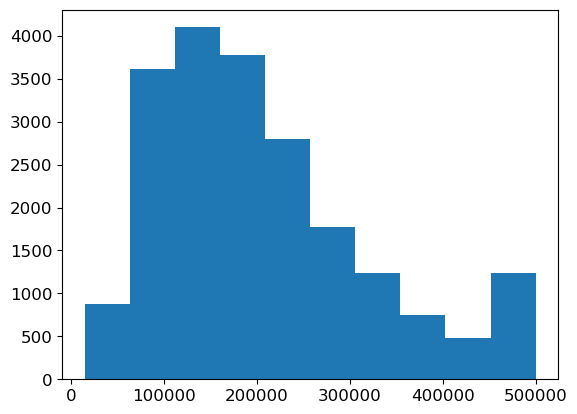

In [70]:
plt.hist(housing_imp["median_house_value"])

(array([   5.,   11.,   50.,  675., 1625., 3029., 4523., 4821., 3371.,
        2530.]),
 array([ 9.61573881,  9.96640147, 10.31706412, 10.66772678, 11.01838944,
        11.36905209, 11.71971475, 12.07037741, 12.42104006, 12.77170272,
        13.12236538]),
 <BarContainer object of 10 artists>)

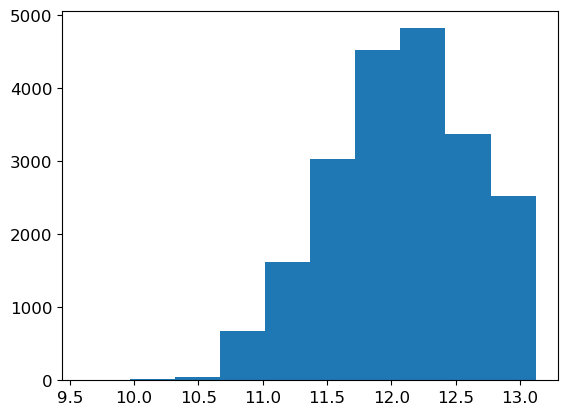

In [71]:
plt.hist(np.log(housing_imp["median_house_value"]))

# transfrom the y (DV)

In [84]:
housing_y = np.log(housing_imp["median_house_value"])
housing_X = housing_imp.drop("median_house_value", axis=1) # drop labels for training set

In [85]:
import statsmodels.api as sm

In [86]:
OLS_model = sm.OLS(housing_y,housing_X)
model = OLS_model.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     2984.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:47:31   Log-Likelihood:                -6227.7
No. Observations:               20640   AIC:                         1.249e+04
Df Residuals:                   20625   BIC:                         1.260e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
longitude                   -0.1699      0.005    -34.814      0.000      -0.179      -0.160
latitude                    -0.1655      0.005    -34.342      0.000      -0.175      -0.156
housing_median_age           0.0026      0.000     12.313      0.000       0.002       0.003
total_rooms               4.293e-06   4.49e-06      0.955      0.339   -4.51e-06    1.31e-05
total_bedrooms            7.993e-05   3.79e-05      2.111      0.035     5.7e-06       0.000
population                  -0.0002   5.28e-06    -34.607      0.000      -0.000      -0.000
households                   0.0005   3.95e-05     13.012      0.000       0.000       0.001
median_income                0.1710      0.002     96.075      0.000       0.167       0.174
<1H OCEAN                   -3.2605      0.422     -7.729      0.000      -4.087      -2.434
INLAND                      -3.5536      0.417     -8.522      0.000      -4.371      -2.736
NEAR BAY                    -3.2980      0.424     -7.780      0.000      -4.129      -2.467
NEAR OCEAN                  -3.2951      0.424     -7.780      0.000      -4.125      -2.465
rooms_per_household          0.0157      0.001     13.031      0.000       0.013       0.018
bedrooms_per_room            0.7574      0.066     11.524      0.000       0.629       0.886
population_per_household     0.0005      0.000      2.226      0.026    6.02e-05       0.001
==============================================================================
Omnibus:                     1247.879   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5514.405
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       5.528   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# "total_rooms" is not a significant variable based on the p-value, drop it !


In [87]:
housing_X_ = housing_X.drop('total_rooms', axis = 1) #for LR only

In [88]:
OLS_model_ = sm.OLS(housing_y,housing_X_)
model_ = OLS_model_.fit()
model_.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     3214.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:49:40   Log-Likelihood:                -6228.2
No. Observations:               20640   AIC:                         1.248e+04
Df Residuals:                   20626   BIC:                         1.260e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
longitude                   -0.1697      0.005    -34.801      0.000      -0.179      -0.160
latitude                    -0.1654      0.005    -34.329      0.000      -0.175      -0.156
housing_median_age           0.0026      0.000     12.286      0.000       0.002       0.003
total_bedrooms            9.921e-05   3.21e-05      3.095      0.002    3.64e-05       0.000
population                  -0.0002   5.07e-06    -35.823      0.000      -0.000      -0.000
households                   0.0005   3.95e-05     12.981      0.000       0.000       0.001
median_income                0.1714      0.002     99.033      0.000       0.168       0.175
<1H OCEAN                   -3.2454      0.422     -7.699      0.000      -4.072      -2.419
INLAND                      -3.5382      0.417     -8.492      0.000      -4.355      -2.721
NEAR BAY                    -3.2827      0.424     -7.749      0.000      -4.113      -2.452
NEAR OCEAN                  -3.2797      0.423     -7.749      0.000      -4.109      -2.450
rooms_per_household          0.0158      0.001     13.142      0.000       0.013       0.018
bedrooms_per_room            0.7252      0.056     12.852      0.000       0.615       0.836
population_per_household     0.0005      0.000      2.170      0.030    4.74e-05       0.001
==============================================================================
Omnibus:                     1237.322   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5431.064
Skew:                           0.070   Prob(JB):                         0.00
Kurtosis:                       5.509   Cond. No.                     7.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
from sklearn.preprocessing import StandardScaler #(xi- x_mean)/std
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, \
RandomizedSearchCV

In [91]:
# Splitting  data into training and testing (80% / 20%)
X_trn, X_val, y_trn, y_val = train_test_split(    
    housing_X_,
    housing_y,
    test_size=0.2,
    random_state = 1234,
    stratify = pd.cut(housing_X_.median_income, bins = 10) 
    # median_income is the most correlated variable to median_house_value
)

In [92]:
OLS_model_ = sm.OLS(y_trn, X_trn)
model_ = OLS_model_.fit()
model_.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2591.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:52:50   Log-Likelihood:                -4926.9
No. Observations:               16512   AIC:                             9882.
Df Residuals:                   16498   BIC:                             9990.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
longitude                   -0.1662      0.005    -30.572      0.000      -0.177      -0.156
latitude                    -0.1623      0.005    -30.230      0.000      -0.173      -0.152
housing_median_age           0.0025      0.000     10.889      0.000       0.002       0.003
total_bedrooms               0.0001   3.49e-05      3.250      0.001    4.51e-05       0.000
population                  -0.0002   5.79e-06    -31.072      0.000      -0.000      -0.000
households                   0.0005   4.33e-05     11.453      0.000       0.000       0.001
median_income                0.1713      0.002     88.859      0.000       0.168       0.175
<1H OCEAN                   -2.9176      0.470     -6.213      0.000      -3.838      -1.997
INLAND                      -3.2162      0.464     -6.929      0.000      -4.126      -2.306
NEAR BAY                    -2.9480      0.472     -6.247      0.000      -3.873      -2.023
NEAR OCEAN                  -2.9515      0.472     -6.259      0.000      -3.876      -2.027
rooms_per_household          0.0142      0.001     11.392      0.000       0.012       0.017
bedrooms_per_room            0.6849      0.063     10.854      0.000       0.561       0.809
population_per_household     0.0022      0.001      3.676      0.000       0.001       0.003
==============================================================================
Omnibus:                     1054.500   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4954.047
Skew:                           0.058   Prob(JB):                         0.00
Kurtosis:                       5.681   Cond. No.                     7.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
lr_pred = model_.predict(X_val)

In [94]:
lr_pred[:10] #log transformed, you take np.exp(y_pred)

14620    12.052642
11013    12.286814
3764     12.290318
1857     11.678396
3134     11.697172
4121     12.428481
12497    11.933345
1679     12.142944
3573     12.813620
8729     12.309646
dtype: float64

In [95]:
np.exp( 12.052642)

171552.05032868704

In [100]:
from sklearn.metrics import *

In [96]:
#self_define rmse :root mean squared error
def rmse(y_obs, y_pred):
    return np.sqrt(np.mean((y_obs - y_pred)**2))

In [98]:
lr_rmse = rmse(np.exp(y_val), np.exp(lr_pred))
lr_rmse #

91628.97153364815

In [101]:
# or 
mean_squared_error(np.exp(y_val), np.exp(lr_pred), squared=False)

91628.97153364803

In [102]:
r2_score(np.exp(y_val), np.exp(lr_pred)) #37.9%

0.3787584357592514

## Feature Scaling - a must-have for ML regression 
One of the most important transformations you need to apply to your data is `feature scaling`. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

In [103]:
#scale numeric features
scaler = StandardScaler()
scaler.fit(housing_X_)

StandardScaler()

In [68]:
from sklearn.preprocessing import StandardScaler

In [110]:
sklearn.__version__

'1.3.2'

In [ ]:
#pip install scikit-learn==1.3.2

In [104]:
scaler = StandardScaler().set_output(transform="pandas")

In [105]:
housing_X_scale = scaler.fit_transform(housing_X) #no need to drop 'total_rooms'

In [106]:
housing_X_scale.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [107]:
housing_X_scale.median_income.mean()

3.7342545076817945e-16

In [108]:
housing_X_scale.median_income.var()

1.0000484519598782

In [109]:
housing_X_scale.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [111]:
# Splitting  data into training and testing (80% / 20%)
X_trn, X_val, y_trn, y_val = train_test_split(    
    housing_X_scale,
    housing_y,
    test_size=0.2,
    random_state = 1234,
    stratify = pd.cut(housing_X_scale.median_income, bins = 10) # median_income is the most correlated variable to median_house_value
)

In [87]:
X_val.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14620   1.202758 -1.330521            0.267020    -0.414732       -0.296561   
11013   0.868340 -0.871699           -0.209729     1.052107        0.748705   
3764    0.578844 -0.684424           -0.130270     0.293935        0.261706   
1857   -2.296149  2.869112           -0.686477     0.017069        0.000390   
3134    0.613783 -0.361375           -1.401600     2.162320        2.242961   

       population  households  median_income  <1H OCEAN    INLAND  NEAR BAY  \
14620    0.126739   -0.189735      -0.280649  -0.891156 -0.681889 -0.353264   
11013    0.727215    0.832967       0.212830   1.122138 -0.681889 -0.353264   
3764    -0.038392    0.301999       0.002279   1.122138 -0.681889 -0.353264   
1857    -0.126698    0.037823      -0.742283  -0.891156 -0.681889 -0.353264   
3134     1.894611    2.114614      -0.558472  -0.891156  1.466514 -0.353264   

       NEAR OCEAN  rooms_per_household  bedrooms_per_room  \
14620    2.598203            -0.555809           0.440651   
11013   -0.384881             0.242154          -0.691964   
3764    -0.384881            -0.040639          -0.264585   
1857     2.598203            -0.092401          -0.203638   
3134    -0.384881             0.077830          -0.198832   

       population_per_household  
14620                  0.058139  
11013                 -0.030933  
3764                  -0.079291  
1857                  -0.055508  
3134                  -0.032788

In [88]:
X_trn.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
330    -1.302879  0.982320            1.061601     0.659269        0.798593   
9137    0.608792 -0.520559           -1.163225     0.391571        0.128672   
3829    0.553888 -0.675060           -0.686477     1.538456        3.045915   
14274   1.217731 -1.372658            1.538349    -0.847907       -0.731297   
1753   -1.382740  1.090003            0.346478    -0.375310       -0.230044   

       population  households  median_income  <1H OCEAN    INLAND  NEAR BAY  \
330      1.157262    0.733574      -0.745178  -0.891156 -0.681889  2.830742   
9137     0.251249    0.210453       1.077195  -0.891156  1.466514 -0.353264   
3829     3.002843    2.962071      -0.603740   1.122138 -0.681889 -0.353264   
14274   -0.449012   -0.702394      -1.050477  -0.891156 -0.681889 -0.353264   
1753    -0.181447   -0.289128      -0.701383  -0.891156 -0.681889  2.830742   

       NEAR OCEAN  rooms_per_household  bedrooms_per_room  \
330     -0.384881            -0.083231           0.025277   
9137    -0.384881             0.237759          -0.749969   
3829    -0.384881            -0.710328           1.565407   
14274    2.598203            -0.819042           1.373468   
1753    -0.384881            -0.306392           0.511736   

       population_per_household  
330                    0.042080  
9137                  -0.011783  
3829                  -0.010933  
14274                  0.086565  
1753                   0.006316

# 5.Select and train a model 

## 5.1 Linear Regression (baseline model)
Training and Evaluating on the Training Set  
The good news is that thanks to all these previous steps, things are now going to be
much simpler than you might think. Let’s first train a Linear Regression model, like
we did in the previous Lectures

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_trn, y_trn) 

LinearRegression()

In [113]:
housing_predictions = lin_reg.predict(X_val)
lin_rmse = rmse(np.exp(y_val), np.exp(housing_predictions))
lin_rmse #compared to 91622, slightly worse, no benefit

91995.44140835849

In [95]:
r2_score(np.exp(y_val), np.exp(housing_predictions)) 

0.37382565142566315

Okay, this is better than nothing but clearly not a great score: most districts’
median_housing_values range between \\$120,000 and \\$265,000, so a typical prediction
error of \\$67,874 is not very satisfying. This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough.   
The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, so this rules
out the last option. You could try to add more features (e.g., the log of the population),
but first let’s try a more complex model to see how it does

In [93]:
from sklearn.metrics import mean_absolute_percentage_error # mean_absolute_error

#or define your self
def mean_absolute_percentage_error_(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)), 4)

In [111]:
mean_absolute_percentage_error_(np.exp(y_val), np.exp(housing_predictions))

0.2616

## 5.3 Random Forest (bagging algorithm)

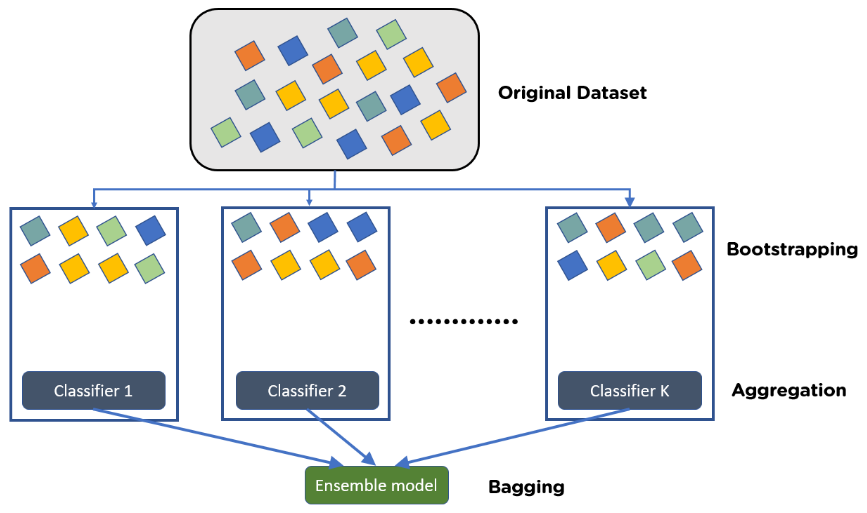

In [114]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_trn, y_trn)


RandomForestRegressor(n_estimators=10, random_state=42)

In [97]:
rf_predictions = forest_reg.predict(X_val)
forest_rmse = rmse(np.exp(y_val), np.exp(rf_predictions))
#forest_rmse = np.sqrt(forest_mse)
forest_rmse

53510.01908283726

In [99]:
r2_score(np.exp(y_val), np.exp(rf_predictions)) #78.8%

0.788132133964551

In [100]:
mean_absolute_percentage_error(np.exp(y_val), np.exp(rf_predictions)) 

0.1740139066803576

# CatBoost Regressor (boosting algorithm - iteration/step)
* The difference of boosting vs bagging is that boosting algorithm use all data pointss every interation, the weight of data points are adjusted by adding more weight (penalty) to those data points have larger error, untill no improvement in prediction accuracy.   

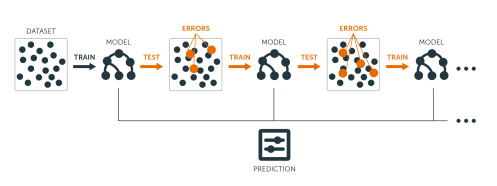

In [116]:
try:
    import catboost
except:
    !pip install catboost
    import catboost

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 101.0/101.0 MB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [117]:
catboost.__version__

'1.2.2'

In [118]:
from catboost import CatBoostRegressor
catboost_reg = CatBoostRegressor(random_state=42)
catboost_reg.fit(X_trn, y_trn, silent = True)

In [103]:
catboost_reg.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 42,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'lea

In [119]:
cb_predictions = catboost_reg.predict(X_val)
cb_rmse = rmse(np.exp(y_val), np.exp(cb_predictions))
#cb_rmse = np.sqrt(cb_mse)
cb_rmse #even better!

46728.08475887607

In [107]:
r2_score(np.exp(y_val), np.exp(cb_predictions)) #83.8%

0.8384954541456364

In [108]:
mean_absolute_percentage_error(np.exp(y_val), np.exp(cb_predictions)) 

0.14752306643613103

* we practice data preparation for regresion tasks
* compare multiple algritms to get the best prediction of califonia house price by census tract

## 6.1 Better Evaluation Using Cross-Validation

Watch: https://www.youtube.com/watch?v=fSytzGwwBVw

One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then
train your models against the smaller training set and evaluate them against the validation
set. It’s a bit of work, but nothing too difficult and it would work fairly well.  

A great alternative is to use Scikit-Learn’s cross-validation feature. The following code
performs K-fold cross-validation: it randomly splits the training set into 5 distinct
subsets called folds, then it trains and evaluates the Decision Tree model 5 times,
picking a different fold for evaluation every time and training on the other 4 folds.
The result is an array containing the 5 evaluation scores:

# out-of-sample 5-fold CV

In [109]:
from sklearn.model_selection import KFold

In [110]:
cb_reg = CatBoostRegressor(random_state=42, silent = True)

In [111]:
kf = KFold(n_splits=5, random_state=42,shuffle=True) #5-fold split

In [117]:
rmse_cv = []
mape_cv = []
r2_cv = []
for train_index,test_index in kf.split(housing_X_, housing_y):
    X_train, X_test = housing_X_.iloc[train_index,:], housing_X_.iloc[test_index, :], 
    y_train, y_test = housing_y[train_index], housing_y[test_index]
    
    cb_reg.fit(X_train, y_train, silent = True)
    tst_pred = cb_reg.predict(X_test)
    
    r2_cv.append(r2_score(np.exp(tst_pred), np.exp(y_test)))     
    rmse_cv.append(rmse(np.exp(tst_pred), np.exp(y_test)))    
    mape_cv.append(mean_absolute_percentage_error(np.exp(tst_pred), np.exp(y_test)))

In [113]:
rmse_cv

[45571.903985735065,
 45424.10268764397,
 45633.59268097664,
 43444.21253513119,
 46472.65250848761]

In [114]:
np.mean(rmse_cv) #to be reported

45309.2928795949

In [115]:
mape_cv

[0.15004396994032546,
 0.1484306161408066,
 0.14948896829992322,
 0.14474372035251415,
 0.15275762024952666]

In [116]:
np.mean(mape_cv) #to be reported

0.14909297899661922

In [118]:
r2_cv

[0.8091551875035161,
 0.8184213154965905,
 0.8113283382260496,
 0.8324815216929619,
 0.8019161375952912]

In [119]:
np.mean(r2_cv)

0.8146605001028819

# Explanation of model, e.g. Catboost model
* https://mathdatasimplified.com/2023/05/20/shap-explain-any-machine-learning-model-in-python-4/

In [121]:
try:
    import shap
except:
    !pip install shap
    import shap

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 447.3/447.3 kB 7.0 MB/s eta 0:00:00


In [124]:
import shap

cb_explainer = shap.Explainer(catboost_reg)
shap_values = cb_explainer(X_trn)

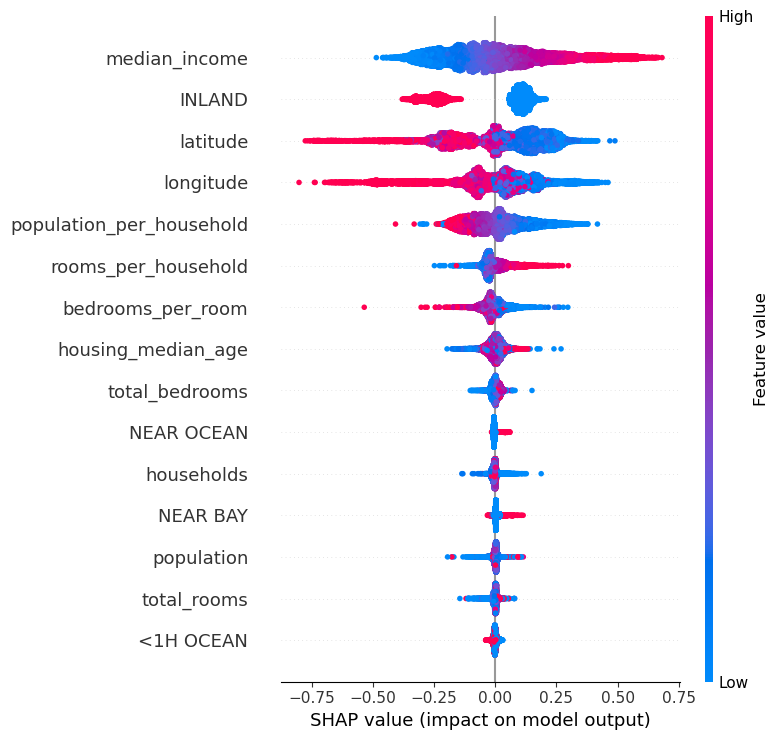

In [125]:
shap.summary_plot(shap_values, X_trn)

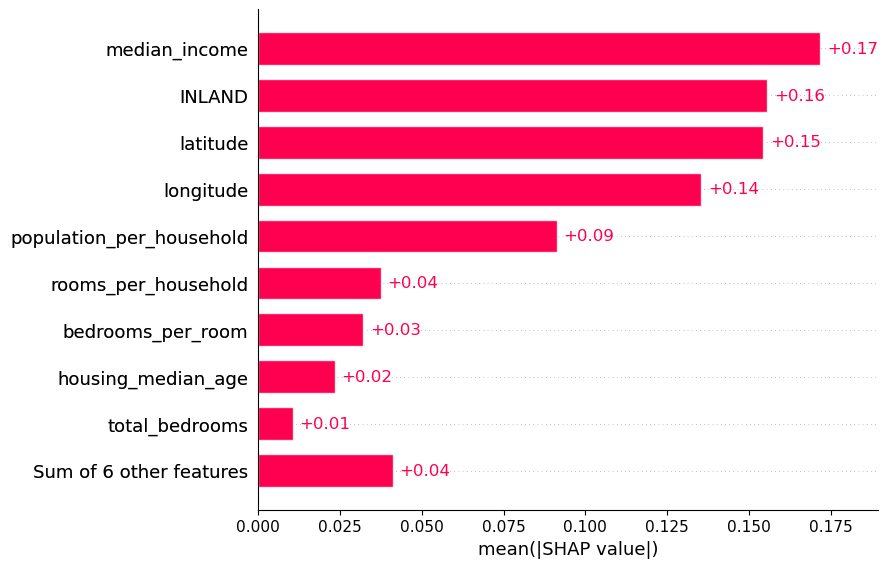

In [126]:
shap.plots.bar(shap_values)

# Appendix

# Randomized search CV (takes a long time, so it is less favored) 

In [243]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"depth": list(range(4, 8, 1)),
        "learning_rate": np.linspace(0.01, 0.1, 5)
       }

cb_reg = CatBoostRegressor(silent = True)

#test 10 random samples from 20 

cb_rs_search = RandomizedSearchCV(cb_reg, param_distributions=param_distribs, 
                                n_iter=10, cv=5, 
                                  scoring='neg_root_mean_squared_error', random_state=42)
cb_rs_search.fit(X_trn, y_trn)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f5fc6f14b10>,
                   param_distributions={'depth': [4, 5, 6, 7],
                                        'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ])},
                   random_state=42, scoring='neg_mean_squared_error')

In [244]:
cvres = cb_rs_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.25459171960281823 {'learning_rate': 0.01, 'depth': 4}
0.21119120114489895 {'learning_rate': 0.05500000000000001, 'depth': 7}
0.23664690192672258 {'learning_rate': 0.01, 'depth': 7}
0.2283662003970607 {'learning_rate': 0.0325, 'depth': 4}
0.21287447743908255 {'learning_rate': 0.0775, 'depth': 5}
0.24703508523977138 {'learning_rate': 0.01, 'depth': 5}
0.2190552402819806 {'learning_rate': 0.0325, 'depth': 6}
0.21714923901815758 {'learning_rate': 0.0775, 'depth': 4}
0.2090329701588354 {'learning_rate': 0.0775, 'depth': 7}
0.2162215853374055 {'learning_rate': 0.0325, 'depth': 7}


In [245]:
cb_rs_search.best_params_

{'learning_rate': 0.0775, 'depth': 7}

In [246]:
np.sqrt(-cvres["mean_test_score"].max())

0.2090329701588354

# variable importance

In [247]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

NameError: name 'grid_search' is not defined

In [ ]:
{X_trn.columns[i]:feature_importances[i] for i in range(len(feature_importances))}

In [ ]:
# Alternatively, you can try to get Shapley values of variables 
# https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/

## Checklist:
    
### Frame the Problem and Look at the Big Picture
1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

### Get the Data
Note: automate as much as possible so you can easily get fresh data.
1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!).

### Explore the Data
Note: try to get insights from a field expert for these steps.
1. Create a copy of the data for exploration (sampling it down to a manageable size
if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
    • Name  
    • Type (categorical, int/float, bounded/unbounded, text, structured, etc.)  
    • % of missing values  
    • Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)  
    • Possibly useful for the task?  
    • Type of distribution (Gaussian, uniform, logarithmic, etc.)  
4. For supervised learning tasks, identify the target attribute(s).  
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful (go back to “Get the Data” on page 498).
10. Document what you have learned.

### Prepare the Data
Notes:
• Work on copies of the data (keep the original dataset intact).
• Write functions for all data transformations you apply, for five reasons:
    —So you can easily prepare the data the next time you get a fresh dataset  
    —So you can apply these transformations in future projects  
    —To clean and prepare the test set  
    —To clean and prepare new data instances once your solution is live  
    —To make it easy to treat your preparation choices as hyperparameters
1. Data cleaning:  
    • Fix or remove outliers (optional).  
    • Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
    columns).
2. Feature selection (optional):  
    • Drop the attributes that provide no useful information for the task.
3. Feature engineering, where appropriate:  
    • Discretize continuous features.  
    • Decompose features (e.g., categorical, date/time, etc.).  
    • Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.).  
    • Aggregate features into promising new features.  
4. Feature scaling: standardize or normalize features.

### Short-List Promising Models
Notes:  
    • If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).  
    • Once again, try to automate these steps as much as possible.  
1. Train many quick and dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.
2. Measure and compare their performance.   
    • For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the types of errors the models make.  
    • What data would a human have used to avoid these errors?
5. Have a quick round of feature selection and engineering.
6. Have one or two more quick iterations of the five previous steps.
7. Short-list the top three to five most promising models, preferring models that make different types of errors.

### Fine-Tune the System
Notes:  
    • You will want to use as much data as possible for this step, especially as you move    toward the end of fine-tuning.  
    • As always automate what you can.  
1. Fine-tune the hyperparameters using cross-validation.  
    • Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or with the median value? Or just drop the rows?).  
    • Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek, Hugo Larochelle, and Ryan Adams).
2. Try Ensemble methods. Combining your best models will often perform better than running them individually.
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

### Present Your Solution
1. Document what you have done.
2. Create a nice presentation.  
    • Make sure you highlight the big picture first.  
3. Explain why your solution achieves the business objective.  
4. Don’t forget to present interesting points you noticed along the way.  
    • Describe what worked and what did not.  
    • List your assumptions and your system’s limitations.  
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

## Download data from website

In [279]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_URL

'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [287]:
os.getcwd() #get current path

'C:\\Users\\chang\\Dropbox\\GQ\\ECO6973'

In [280]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [294]:
fetch_housing_data(HOUSING_URL, housing_path=os.getcwd()+"\\Downloads")

In [297]:
!ls ./Downloads

housing.csv
housing.tgz


In [281]:
from IPython.display import IFrame
IFrame(src='https://docs.python.org/3/library/urllib.request.html', width=1000, height=600)

**Warning**: Since Scikit-Learn 0.20, the `sklearn.preprocessing.Imputer` class was replaced by the `sklearn.impute.SimpleImputer` class.

**Warning**: earlier versions of the book used the `LabelEncoder` class or Pandas' `Series.factorize()` method to encode string categorical attributes as integers. However, the `OrdinalEncoder` class that was introduced in Scikit-Learn 0.20 (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)) is preferable since it is designed for input features (`X` instead of labels `y`) and it plays well with pipelines (introduced later in this notebook). If you are using an older version of Scikit-Learn (<0.20), then you can import it from `future_encoders.py` instead.

**Warning**: earlier versions of the book used the `LabelEncoder` class or Pandas' `Series.factorize()` method to encode string categorical attributes as integers. However, the `OrdinalEncoder` class that was introduced in Scikit-Learn 0.20 (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)) is preferable since it is designed for input features (`X` instead of labels `y`) and it plays well with pipelines (introduced later in this notebook). If you are using an older version of Scikit-Learn (<0.20), then you can import it from `future_encoders.py` instead.

**Warning**: earlier versions of the book used the `LabelBinarizer` or `CategoricalEncoder` classes to convert each categorical value to a one-hot vector. It is now preferable to use the `OneHotEncoder` class. Since Scikit-Learn 0.20 it can handle string categorical inputs (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)), not just integer categorical inputs. If you are using an older version of Scikit-Learn, you can import the new version from `future_encoders.py`: